In [1]:
import sys
sys.path.append('..')
import numpy as np
import cupy as cp
import dask.array as da
import jax.numpy as jnp

import matplotlib.pyplot as plt


# SubSampling

In [2]:
from pycsou.linop.sampling import SubSampling

for xp in [np, cp]:
    x = xp.arange(9).reshape(3,3)
    sampling_indices = [0,2]
    SamplingOp=SubSampling(size=x.size, sampling_indices=sampling_indices)
    print(SamplingOp * x.reshape(-1))
    # array([0, 2])
    print(SamplingOp.adjoint(SamplingOp* x.reshape(-1)).reshape(x.shape))
    # array([[0., 0., 2.],[0., 0., 0.],[0., 0., 0.]])
    SamplingOp=SubSampling(size=x.size, sampling_indices=sampling_indices, shape=x.shape, axis=1)
    print((SamplingOp * x.reshape(-1)).reshape(x.shape[1], len(sampling_indices)))
    # array([[0, 2],[3, 5],[6, 8]])
    print(SamplingOp.adjoint(SamplingOp* x.reshape(-1)).reshape(x.shape))
    # array([[0., 0., 2.],[3., 0., 5.],[6., 0., 8.]])

[0 2]
[[0. 0. 2.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0 2]
 [3 5]
 [6 8]]
[[0. 0. 2.]
 [3. 0. 5.]
 [6. 0. 8.]]
[0 2]
[[0. 0. 2.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0 2]
 [3 5]
 [6 8]]
[[0. 0. 2.]
 [3. 0. 5.]
 [6. 0. 8.]]


# Masking

In [3]:
from pycsou.linop.sampling import Masking, SubSampling

for xp in [np, cp]:
    x = xp.arange(9).reshape(3,3)
    sampling_bool = xp.zeros((3,3)).astype(bool)
    sampling_bool[[1,2],[0,2]] = True
    SamplingOp = Masking(size=x.size, sampling_bool=sampling_bool, _xp = xp)
    print(SamplingOp * x.reshape(-1))
    # array([3, 8])
    print(SamplingOp.adjoint(SamplingOp* x.reshape(-1)).reshape(x.shape))
    # array([[0., 0., 0.],[3., 0., 0.],[0., 0., 8.]])
    sampling_indices = xp.nonzero(sampling_bool.reshape(-1))[0].astype(int)
    SubSamplingOp=SubSampling(size=x.size, sampling_indices=sampling_indices)
    print(xp.allclose(SamplingOp * x.reshape(-1), SubSamplingOp * x.reshape(-1)))
    # True

[3 8]
[[0. 0. 0.]
 [3. 0. 0.]
 [0. 0. 8.]]
True
[3 8]
[[0. 0. 0.]
 [3. 0. 0.]
 [0. 0. 8.]]
True


# DownSampling

In [4]:
from pycsou.linop.sampling import DownSampling

for xp in [np, cp]:
    x = xp.arange(10)
    DownSamplingOp = DownSampling(size=x.size, downsampling_factor=3)
    print(DownSamplingOp * x)
    # array([0, 3, 6, 9])
    print(DownSamplingOp.adjoint(DownSamplingOp * x))
    # array([0., 0., 0., 3., 0., 0., 6., 0., 0., 9.])
    x = xp.arange(20).reshape(4,5)
    DownSamplingOp = DownSampling(size=x.size, shape=x.shape, downsampling_factor=3)
    print((DownSamplingOp * x.flatten()).reshape(DownSamplingOp.output_shape))
    # array([[ 0,  3],[15, 18]])
    DownSamplingOp = DownSampling(size=x.size, shape=x.shape, downsampling_factor=(2,4))
    print((DownSamplingOp * x.flatten()).reshape(DownSamplingOp.output_shape))
    # array([[ 0,  4],[10, 14]])
    print(DownSamplingOp.adjoint(DownSamplingOp * x.flatten()).reshape(x.shape))
    # array([[ 0.,  0.,  0.,  0.,  4.],[ 0.,  0.,  0.,  0.,  0.],[10.,  0.,  0.,  0., 14.],[ 0.,  0.,  0.,  0.,  0.]])
    DownSamplingOp = DownSampling(size=x.size, shape=x.shape, downsampling_factor=2, axis=-1)
    print((DownSamplingOp * x.flatten()).reshape(DownSamplingOp.output_shape))
    # array([[ 0,  2,  4],[ 5,  7,  9],[10, 12, 14],[15, 17, 19]])
    print(DownSamplingOp.adjoint(DownSamplingOp * x.flatten()).reshape(x.shape))
    # array([[ 0.,  0.,  2.,  0.,  4.],[ 5.,  0.,  7.,  0.,  9.],[10.,  0., 12.,  0., 14.],[15.,  0., 17.,  0., 19.]])

[0 3 6 9]
[0. 0. 0. 3. 0. 0. 6. 0. 0. 9.]
[[ 0  3]
 [15 18]]
[[ 0  4]
 [10 14]]
[[ 0.  0.  0.  0.  4.]
 [ 0.  0.  0.  0.  0.]
 [10.  0.  0.  0. 14.]
 [ 0.  0.  0.  0.  0.]]
[[ 0  2  4]
 [ 5  7  9]
 [10 12 14]
 [15 17 19]]
[[ 0.  0.  2.  0.  4.]
 [ 5.  0.  7.  0.  9.]
 [10.  0. 12.  0. 14.]
 [15.  0. 17.  0. 19.]]
[0 3 6 9]
[0. 0. 0. 3. 0. 0. 6. 0. 0. 9.]
[[ 0  3]
 [15 18]]
[[ 0  4]
 [10 14]]
[[ 0.  0.  0.  0.  4.]
 [ 0.  0.  0.  0.  0.]
 [10.  0.  0.  0. 14.]
 [ 0.  0.  0.  0.  0.]]
[[ 0  2  4]
 [ 5  7  9]
 [10 12 14]
 [15 17 19]]
[[ 0.  0.  2.  0.  4.]
 [ 5.  0.  7.  0.  9.]
 [10.  0. 12.  0. 14.]
 [15.  0. 17.  0. 19.]]


# Pooling

[[ 4.  7.]
 [16. 19.]]
[[ 4.  4.  4.  7.  7.  7.]
 [ 4.  4.  4.  7.  7.  7.]
 [16. 16. 16. 19. 19. 19.]
 [16. 16. 16. 19. 19. 19.]]
[[ 24  42]
 [ 96 114]]
[[ 24  24  24  42  42  42]
 [ 24  24  24  42  42  42]
 [ 96  96  96 114 114 114]
 [ 96  96  96 114 114 114]]
[[ 4.  7.]
 [16. 19.]]
[[ 4.  4.  4.  7.  7.  7.]
 [ 4.  4.  4.  7.  7.  7.]
 [16. 16. 16. 19. 19. 19.]
 [16. 16. 16. 19. 19. 19.]]
[[ 24  42]
 [ 96 114]]
[[ 24  24  24  42  42  42]
 [ 24  24  24  42  42  42]
 [ 96  96  96 114 114 114]
 [ 96  96  96 114 114 114]]


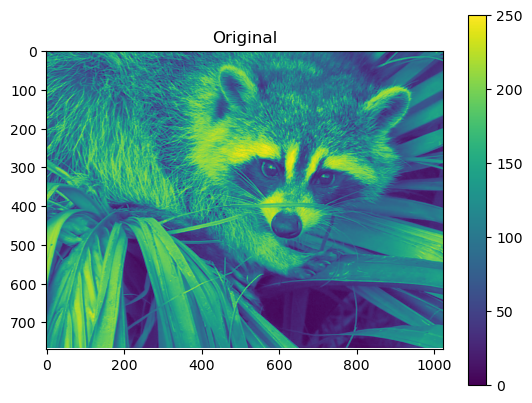

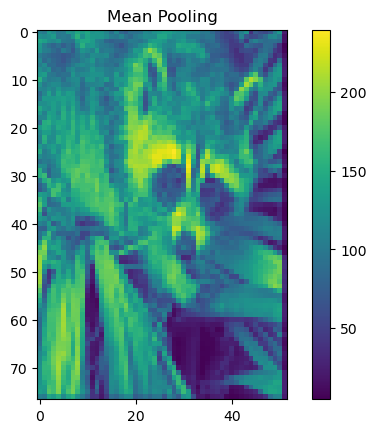

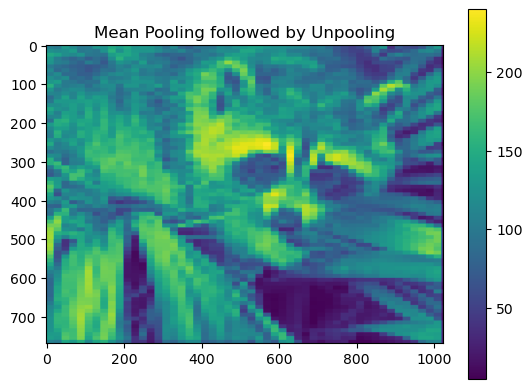

In [10]:
from pycsou.linop.sampling import Pooling
import scipy.misc

for xp in [cp, np]:
    x = np.arange(24).reshape(4,6)
    PoolingOp = Pooling(shape=x.shape, block_size=(2,3), pooling_func='mean')
    print((PoolingOp * x.flatten()).reshape(PoolingOp.output_shape))
    # array([[ 4.,  7.],[16., 19.]])
    print(PoolingOp.adjoint(PoolingOp * x.flatten()).reshape(x.shape))
    # array([[ 4.,  4.,  4.,  7.,  7.,  7.],[ 4.,  4.,  4.,  7.,  7.,  7.],[16., 16., 16., 19., 19., 19.],[16., 16., 16., 19., 19., 19.]])
    PoolingOp = Pooling(shape=x.shape, block_size=(2,3), pooling_func='sum')
    print((PoolingOp * x.flatten()).reshape(PoolingOp.output_shape))
    # array([[ 24,  42],[ 96, 114]])
    print(PoolingOp.adjoint(PoolingOp * x.flatten()).reshape(x.shape))
    # array([[ 24,  24,  24,  42,  42,  42],[ 24,  24,  24,  42,  42,  42],[ 96,  96,  96, 114, 114, 114],[ 96,  96,  96, 114, 114, 114]])

img = scipy.misc.face(gray=True).astype(float)
PoolingOp = Pooling(shape=img.shape, block_size=(10,20))
pooled_img = (PoolingOp * img.flatten()).reshape(PoolingOp.output_shape)
adjoint_img = PoolingOp.adjoint(pooled_img.flatten()).reshape(img.shape)
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.title('Original')
plt.figure()
plt.imshow(pooled_img)
plt.colorbar()
plt.title('Mean Pooling')
plt.figure()
plt.imshow(adjoint_img)
plt.colorbar()
plt.title('Mean Pooling followed by Unpooling')
plt.show()

# NNSampling

[[3.18480844 1.81990733]
 [1.34893357 2.18848968]
 [0.20486762 1.63087497]
 [0.08263818 2.80521727]
 [4.0663512  2.44756066]
 [4.56377789 0.0082155 ]]
[15 13 12 18 16  5]
[[ 0.  0.  0.  0.  0.  5.]
 [ 0.  0.  0.  0.  0.  0.]
 [12. 13.  0. 15. 16.  0.]
 [18.  0.  0.  0.  0.  0.]]


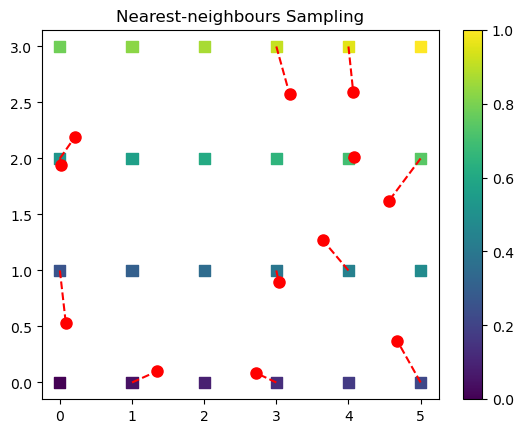

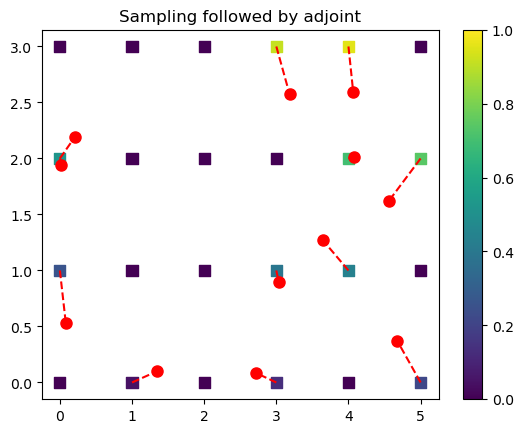

In [11]:
import numpy as np
from pycsou.linop.sampling import NNSampling


rng = np.random.default_rng(seed=0)
x = np.arange(24).reshape(4,6)
grid = np.stack(np.meshgrid(np.arange(6),np.arange(4)), axis=-1)
samples = np.stack((5 * rng.random(size=6),3 * rng.random(size=6)), axis=-1)
print(samples)

NNSamplingOp = NNSampling(samples=samples, grid=grid)
print(NNSamplingOp * x.flatten())
print(NNSamplingOp.adjoint(NNSamplingOp * x.flatten()).reshape(x.shape))

import numpy as np
from pycsou.linop.sampling import NNSampling
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=0)
x = np.arange(24).reshape(4, 6)
grid = np.stack(np.meshgrid(np.arange(6), np.arange(4)), axis=-1)
samples = np.stack((5 * rng.random(size=12), 3 * rng.random(size=12)), axis=-1)
NNSamplingOp = NNSampling(samples=samples, grid=grid)
grid = grid.reshape(-1, 2)
x = x.reshape(-1)
y = (NNSamplingOp * x.flatten())
x_samp = NNSamplingOp.adjoint(y).reshape(x.shape)
plt.scatter(grid[..., 0].reshape(-1), grid[..., 1].reshape(-1), s=64, c=x.reshape(-1), marker='s', vmin=np.min(x),
    vmax=np.max(x))
plt.scatter(samples[:, 0], samples[:, 1], c='r', s=64)
plt.plot(np.stack((grid[NNSamplingOp.nn_indices, 0], samples[:, 0]), axis=0),
 np.stack((grid[NNSamplingOp.nn_indices, 1], samples[:, 1]), axis=0), '--r')
plt.colorbar()
plt.title('Nearest-neighbours Sampling')
plt.figure()
plt.scatter(grid[..., 0].reshape(-1), grid[..., 1].reshape(-1), s=64, c=x_samp.reshape(-1), marker='s',
    vmin=np.min(x),
    vmax=np.max(x))
plt.scatter(samples[:, 0], samples[:, 1], c='r', s=64)
plt.plot(np.stack((grid[NNSamplingOp.nn_indices, 0], samples[:, 0]), axis=0), np.stack((grid[NNSamplingOp.nn_indices, 1], samples[:, 1]), axis=0), '--r')
plt.colorbar()
plt.title('Sampling followed by adjoint')
plt.show()

[[0.08200593 2.04119736]
 [4.55415368 0.49149384]
 [4.85254467 0.81816342]
 [1.04831569 0.01962407]
 [2.2306861  1.3985002 ]
 [4.27791834 0.91282859]]
[12  5 11  1  8 10]
[[ 0.  1.  0.  0.  0.  5.]
 [ 0.  0.  8.  0. 10. 11.]
 [12.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
<class 'cupy._core.core.ndarray'>
<class 'cupy._core.core.ndarray'> 23


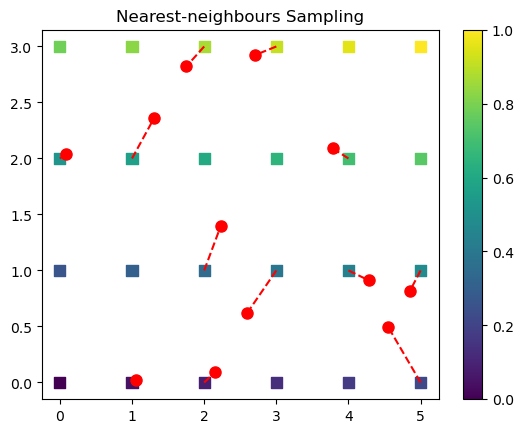

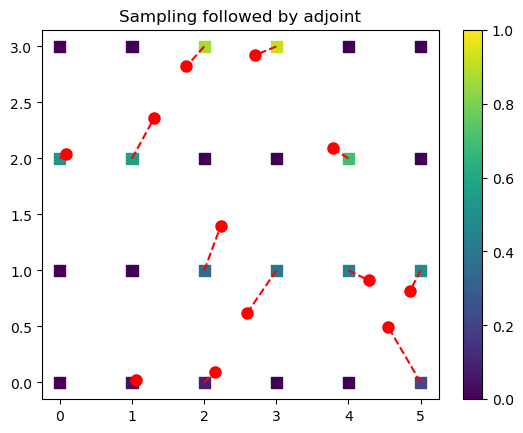

In [12]:
import cupy as cp

rng = cp.random.default_rng(seed=0)
x = cp.arange(24).reshape(4,6)
grid = cp.stack(cp.meshgrid(cp.arange(6),cp.arange(4)), axis=-1)
samples = cp.stack((5 * rng.random(size=6),3 * rng.random(size=6)), axis=-1)
print(samples)

NNSamplingOp = NNSampling(samples=samples, grid=grid)
print(NNSamplingOp * x.flatten())
print(NNSamplingOp.adjoint(NNSamplingOp * x.flatten()).reshape(x.shape))

rng = cp.random.default_rng(seed=0)
x = cp.arange(24).reshape(4, 6)
grid = cp.stack(cp.meshgrid(cp.arange(6), cp.arange(4)), axis=-1)
samples = cp.stack((5 * rng.random(size=12), 3 * rng.random(size=12)), axis=-1)
NNSamplingOp = NNSampling(samples=samples, grid=grid)
grid = grid.reshape(-1, 2)
x = x.reshape(-1)
print(type(x))
y = (NNSamplingOp * x.flatten())
x_samp = NNSamplingOp.adjoint(y).reshape(x.shape)
print(type(cp.min(x)),cp.max(x))
plt.scatter(grid[..., 0].reshape(-1).get(), grid[..., 1].reshape(-1).get(), s=64, c=x.reshape(-1).get(), marker='s', vmin=(cp.min(x)).get(),
    vmax=(cp.max(x)).get())
plt.scatter(samples[:, 0].get(), samples[:, 1].get(), c='r', s=64)
plt.plot(cp.stack((grid[NNSamplingOp.nn_indices, 0], samples[:, 0]), axis=0).get(),
 cp.stack((grid[NNSamplingOp.nn_indices, 1], samples[:, 1]), axis=0).get(), '--r')
plt.colorbar()
plt.title('Nearest-neighbours Sampling')
plt.figure()
plt.scatter(grid[..., 0].reshape(-1).get(), grid[..., 1].reshape(-1).get(), s=64, c=x_samp.reshape(-1).get(), marker='s',
    vmin=cp.min(x).get(),
    vmax=cp.max(x).get())
plt.scatter(samples[:, 0].get(), samples[:, 1].get(), c='r', s=64)
plt.plot(cp.stack((grid[NNSamplingOp.nn_indices, 0], samples[:, 0]), axis=0).get(), cp.stack((grid[NNSamplingOp.nn_indices, 1], samples[:, 1]), axis=0).get(), '--r')
plt.colorbar()
plt.title('Sampling followed by adjoint')
plt.show()

# GeneralisedVandermonde

In [13]:
from pycsou.linop.sampling import GeneralisedVandermonde

for xp in [np, cp]:
    samples = xp.arange(10)
    func1 = lambda t: t**2;  func2 = lambda t: t**3; funcs = [func1, func2]
    VOp = GeneralisedVandermonde(funcs=funcs, samples=samples)
    alpha=xp.ones((2,))
    print(VOp.mat)
    # array([[  0.,   0.],[  1.,   1.],[  4.,   8.],[  9.,  27.],[ 16.,  64.],[ 25., 125.],[ 36., 216.],[ 49., 343.],[ 64., 512.],[ 81., 729.]])
    print(xp.allclose(VOp * alpha, samples ** 2 + samples ** 3))
    # True

[[  0.   0.]
 [  1.   1.]
 [  4.   8.]
 [  9.  27.]
 [ 16.  64.]
 [ 25. 125.]
 [ 36. 216.]
 [ 49. 343.]
 [ 64. 512.]
 [ 81. 729.]]
True
[[  0.   0.]
 [  1.   1.]
 [  4.   8.]
 [  9.  27.]
 [ 16.  64.]
 [ 25. 125.]
 [ 36. 216.]
 [ 49. 343.]
 [ 64. 512.]
 [ 81. 729.]]
True


# MappedDistanceMatrix
TO DO